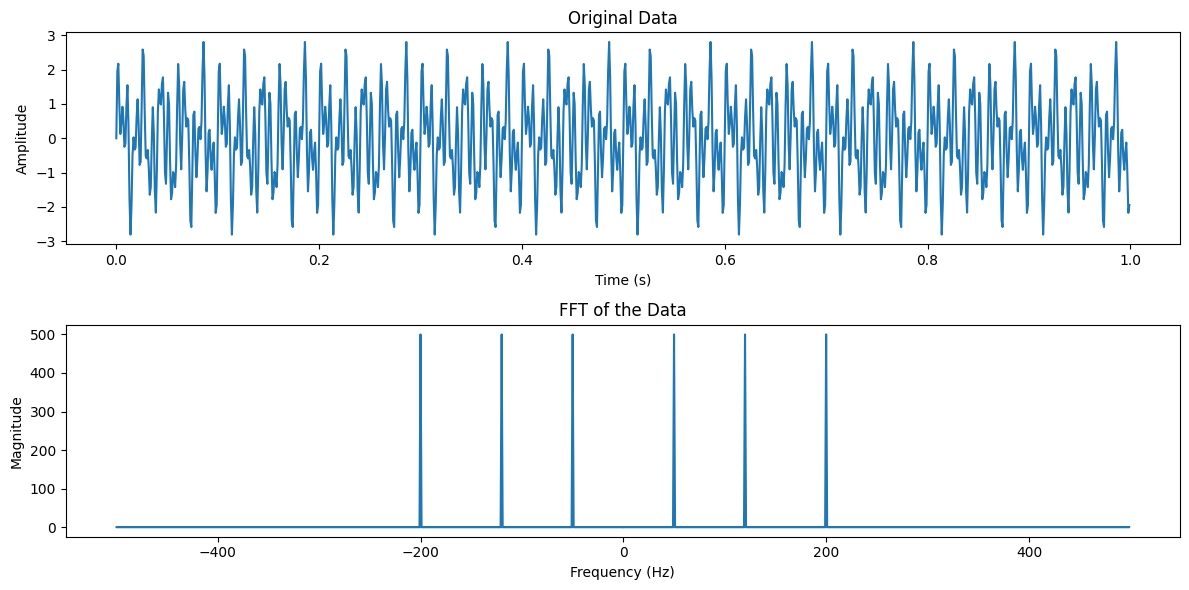

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter

# Generate sample data: a combination of sinusoids at different frequencies
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
frequencies = [50, 120, 200]  # Frequencies in Hz
data = np.sum([np.sin(2 * np.pi * freq * t) for freq in frequencies], axis=0)

# Perform FFT on the data
fft_result = fft(data)
n = len(fft_result)
freq = np.fft.fftfreq(n, d=1/fs)  # Frequency bins

# Plot the original data and its FFT
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, data)
plt.title('Original Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('FFT of the Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

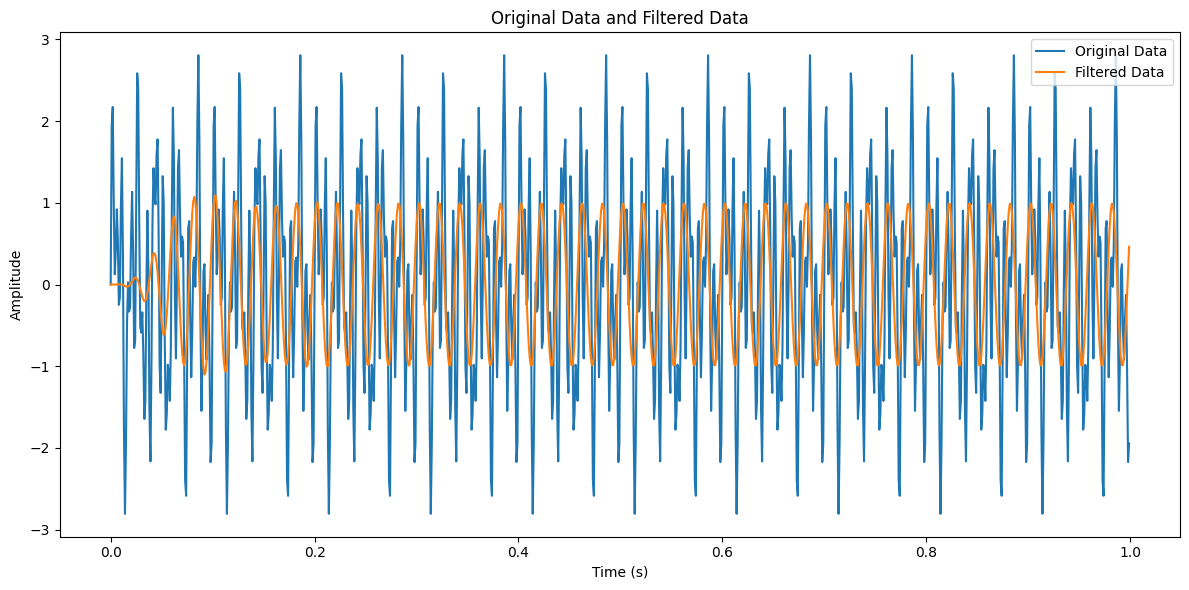

In [2]:

# Define a bandpass filter function using a butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Define the cutoff frequencies for the bandpass filter
lowcut = 40.0  # Lower cutoff frequency (in Hz)
highcut = 70.0  # Upper cutoff frequency (in Hz)

# Apply the bandpass filter to the data
filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)

# Plot the original data and the filtered data
plt.figure(figsize=(12, 6))
plt.plot(t, data, label='Original Data')
plt.plot(t, filtered_data, label='Filtered Data')
plt.title('Original Data and Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()
